In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sub768 = pd.read_csv('submission-768-EB7-1F.csv')
sub768.head()

,image_name,target
0,ISIC_0052060,0.022708
1,ISIC_0052349,0.020689
2,ISIC_0058510,0.024828
3,ISIC_0073313,0.027280
4,ISIC_0073502,0.078627


In [3]:
sub512 = pd.read_csv('submission-512-EB6-3F.csv')
sub512.head()

,image_name,target
0,ISIC_0052060,0.027555
1,ISIC_0052349,0.022967
2,ISIC_0058510,0.027024
3,ISIC_0073313,0.028699
4,ISIC_0073502,0.029710


In [4]:
sub_data = pd.read_csv('20200708-Data-TF-IO-EB3.csv')
sub_data.head()

,image_name,target
0,ISIC_0052060,6.476617e-05
1,ISIC_0052349,3.893586e-05
2,ISIC_0058510,2.258713e-08
3,ISIC_0073313,4.203723e-07
4,ISIC_0073502,1.682541e-02


In [5]:
arr768 = sub768.target.to_numpy()
arr768

array([0.02270768, 0.02068872, 0.02482787, ..., 0.0595891 , 0.02313699,
       0.133599  ])

In [6]:
arr512 = sub512.target.to_numpy()
arr512

array([0.02755478, 0.02296718, 0.02702382, ..., 0.09233765, 0.0286266 ,
       0.10441809])

In [7]:
arr_sub_data = sub_data.target.to_numpy()
arr_sub_data

array([6.4766165e-05, 3.8935865e-05, 2.2587127e-08, ..., 2.2722620e-02,
       1.4993560e-05, 2.2048576e-02])

In [8]:
ct_ensemble = len(arr768)
ct_ensemble

10982

In [9]:
ensemble = np.zeros((ct_ensemble,1))

In [10]:
wght768 = 0.45
ensemble[:,0] += np.mean(arr768.reshape((ct_ensemble,1),order='F'),axis=1) * wght768
ensemble

array([[0.01021846],
       [0.00930993],
       [0.01117254],
       ...,
       [0.02681509],
       [0.01041165],
       [0.06011955]])

In [11]:
wght512 = 0.45
ensemble[:,0] += np.mean(arr512.reshape((ct_ensemble,1),order='F'),axis=1) * wght512
ensemble

array([[0.02261811],
       [0.01964516],
       [0.02333326],
       ...,
       [0.06836703],
       [0.02329362],
       [0.10710769]])

In [12]:
wght_data = 0.1
ensemble[:,0] += np.mean(arr_sub_data.reshape((ct_ensemble,1),order='F'),axis=1) * wght_data
ensemble

array([[0.02262458],
       [0.01964905],
       [0.02333326],
       ...,
       [0.0706393 ],
       [0.02329512],
       [0.10931255]])

In [16]:
# Double Check
wght768+wght512+wght_data

1.0

In [13]:
enseble_image_names = sub768.image_name.to_numpy()
enseble_image_names

array(['ISIC_0052060', 'ISIC_0052349', 'ISIC_0058510', ...,
       'ISIC_9997917', 'ISIC_9998234', 'ISIC_9999302'], dtype=object)

In [14]:
submission = pd.DataFrame(dict(image_name=enseble_image_names, target=ensemble[:,0]))
submission = submission.sort_values('image_name') 
submission.to_csv('ensemble-testing-submission.csv', index=False)
submission.head()

,image_name,target
0,ISIC_0052060,0.022625
1,ISIC_0052349,0.019649
2,ISIC_0058510,0.023333
3,ISIC_0073313,0.025191
4,ISIC_0073502,0.050434


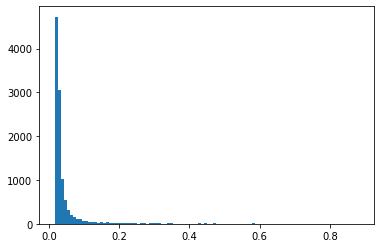

In [15]:
plt.hist(submission.target,bins=100)
plt.show()